In [1]:
import jax.numpy as np
import numpy as onp 
import pandas as pd
import pickle5 as pickle5
import pickle
import time
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
print(sys.path)
sys.path.insert(1,'/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/ITE-1.1_code')
sys.path.insert(1,'/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/')
from latentNoise_funcs_gen import *
from ANLSMN_genfuncs import *

['/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/notebooks', '/home/emiliano/anaconda3/lib/python37.zip', '/home/emiliano/anaconda3/lib/python3.7', '/home/emiliano/anaconda3/lib/python3.7/lib-dynload', '', '/home/emiliano/anaconda3/lib/python3.7/site-packages', '/home/emiliano/anaconda3/lib/python3.7/site-packages/locket-0.2.1-py3.7.egg', '/home/emiliano/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/emiliano/.ipython']
bla
[1] "in func_entropy_v1.R"
2022-01-24 11:11:26,750:WARNING:R[write to console]: Loading required package: spam

2022-01-24 11:11:26,753:WARNING:R[write to console]: Loading required package: dotCall64

2022-01-24 11:11:26,764:WARNING:R[write to console]: Loading required package: grid

2022-01-24 11:11:27,088:WARNING:R[write to console]: Spam version 2.3-0 (2019-09-13) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the

In [32]:
# p-values - first calculate NULL DISTRIBUTIONS
# MMD
num_smpl1 = 1000
num_smpl2 = 10000
dist = onp.random.randn(num_smpl1, num_smpl2)
distSMMDb = onp.apply_along_axis(SMMDb_norm, 0, dist)


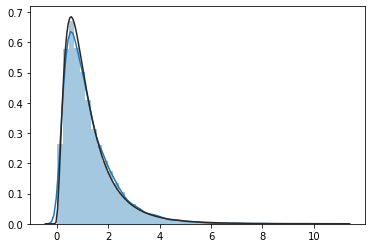

In [48]:
sns.distplot(distSMMDb, fit=stats.lognorm)

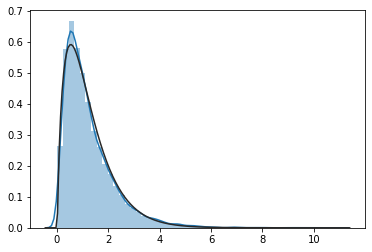

In [49]:
sns.distplot(distSMMDb, fit=stats.gamma)

In [50]:
gamma_alpha, gamma_loc, gamma_beta=stats.gamma.fit(distSMMDb)
ln_shape, ln_loc, ln_scale = stats.lognorm.fit(distSMMDb)
gamma_pars = {"alpha": gamma_alpha, "loc": gamma_loc, "beta":gamma_beta}
ln_pars = {"shape": ln_shape, "loc": ln_loc, "scale":ln_scale}

In [51]:
res_mmd = {"dist":distSMMDb, "gamma_pars": gamma_pars,"ln_pars":ln_pars}

In [52]:
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/null_dists/mmd/"
filename = repos + "mmd_nulldist.pkl"
with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(res_mmd, output, pickle.HIGHEST_PROTOCOL)

In [3]:
# HSIC
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/null_dists/hsicc/parts/"
hsiccDist = [pickle5.load( open(repos + "null_hsicc"+str(i+1)+".pkl", "rb")) for i in range(100)]
hsiccDist = onp.hstack(hsiccDist)

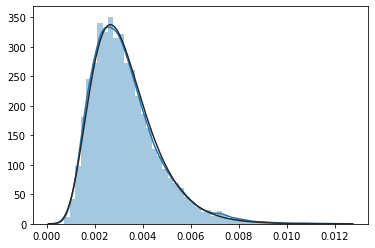

In [54]:
sns.distplot(hsiccDist, fit= stats.lognorm)

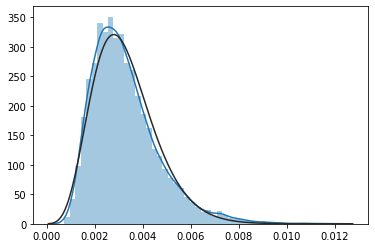

In [55]:
sns.distplot(hsiccDist, fit=stats.gamma)

In [56]:
gamma_alpha, gamma_loc, gamma_beta=stats.gamma.fit(hsiccDist)
ln_shape, ln_loc, ln_scale = stats.lognorm.fit(hsiccDist)
gamma_pars = {"alpha": gamma_alpha, "loc": gamma_loc, "beta":gamma_beta}
ln_pars = {"shape": ln_shape, "loc": ln_loc, "scale":ln_scale}

In [57]:
res_hsicc = {"dist":hsiccDist, "gamma_pars": gamma_pars, "ln_pars":ln_pars}

In [58]:
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/null_dists/hsicc/"
filename = repos + "hsicc_nulldist.pkl"
with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(res_hsicc, output, pickle.HIGHEST_PROTOCOL)

In [424]:
# HSIC RX
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/null_dists/hsicRX/parts/"
q_r = 0.45
hsicRXDist = [pickle5.load( open(repos + "null_hsicRX"+"_"+str(q_r*100)+"_"+str(i+1)+".pkl", "rb")) for i in range(100)]
hsicRXDist = onp.vstack(hsicRXDist)
print(hsicRXDist.shape)
print(hsicRXDist)
hsicRXDist = hsicRXDist[:,1]
print(hsicRXDist.shape)

(10000, 2)
[[0.248 0.002]
 [0.244 0.007]
 [0.244 0.003]
 ...
 [0.246 0.003]
 [0.23  0.002]
 [0.246 0.002]]
(10000,)


In [425]:
onp.sum(onp.isnan(hsicRXDist))

0

In [426]:
onp.min(hsicRXDist)

0.000539896

In [427]:
gamma_alpha, gamma_loc, gamma_beta=stats.gamma.fit(hsicRXDist)
ln_shape, ln_loc, ln_scale = stats.lognorm.fit(hsicRXDist)
gamma_pars = {"alpha": gamma_alpha, "loc": gamma_loc, "beta":gamma_beta}
ln_pars = {"shape": ln_shape, "loc": ln_loc, "scale":ln_scale}
ln_pars

{'shape': 0.2046538159937545,
 'loc': -0.002280015800865767,
 'scale': 0.004748853630320684}

In [428]:
#ln_pars["shape"]=0.17
#ln_pars

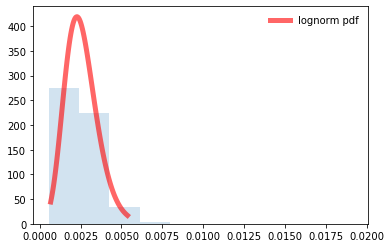

In [429]:
x = np.linspace(stats.lognorm.ppf(0.01, s=ln_pars["shape"],loc=ln_pars["loc"], scale=ln_pars["scale"]), stats.lognorm.ppf(0.99,s=ln_pars["shape"], loc=ln_pars["loc"], scale=ln_pars["scale"]), 100)
#print(x)
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.lognorm.pdf(x,  s=ln_pars["shape"],loc=ln_pars["loc"], scale=ln_pars["scale"]),'r-', lw=5, alpha=0.6, label='lognorm pdf')
ax.hist(hsicRXDist, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

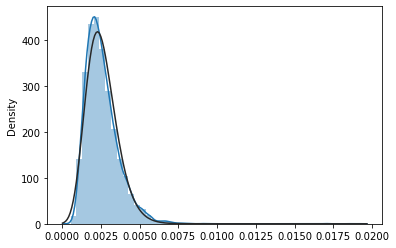

In [430]:
sns.distplot(hsicRXDist, fit=stats.lognorm)

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

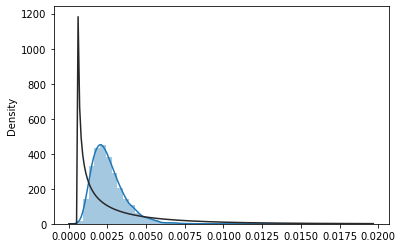

In [431]:
sns.distplot(hsicRXDist, fit=stats.gamma)

In [432]:
res_hsicRX = {"dist":hsicRXDist, "gamma_pars": gamma_pars, "ln_pars":ln_pars}

In [433]:
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/null_dists/hsicRX/"
filename = repos + "hsicRX_nulldist"+"_"+str(q_r*100)+"_"+".pkl"
with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(res_hsicRX, output, pickle.HIGHEST_PROTOCOL)

In [286]:
# HSIC RC
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/null_dists/hsicRC/parts/"
hsicRCDist = [pickle5.load( open(repos + "null_hsicRC"+str(i+1)+".pkl", "rb")) for i in range(100)]
hsicRCDist = onp.vstack(hsicRCDist)
hsicRCDist = hsicRCDist[:,1]

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

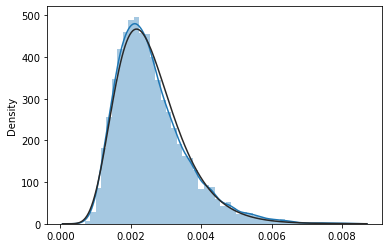

In [287]:
sns.distplot(hsicRCDist, fit=stats.lognorm)

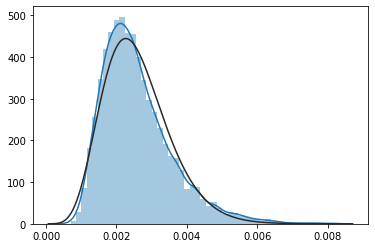

In [67]:
sns.distplot(hsicRCDist, fit=stats.gamma)

In [68]:
gamma_alpha, gamma_loc, gamma_beta=stats.gamma.fit(hsicRCDist)
ln_shape, ln_loc, ln_scale = stats.lognorm.fit(hsicRCDist)
gamma_pars = {"alpha": gamma_alpha, "loc": gamma_loc, "beta":gamma_beta}
ln_pars = {"shape": ln_shape, "loc": ln_loc, "scale":ln_scale}

In [69]:
res_hsicRC = {"dist":hsicRCDist, "gamma_pars": gamma_pars, "ln_pars":ln_pars}

In [70]:
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/null_dists/hsicRC/"
filename = repos + "hsicRC_nulldist.pkl"
with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(res_hsicRC, output, pickle.HIGHEST_PROTOCOL)